In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("laptop_price.csv")

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [6]:
df.drop(columns = 'laptop_ID', inplace = True)

In [7]:
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].astype(float)
df['Ram'] = df['Ram'].astype(int)

In [8]:
df['Memory_Size'] = df.Memory.str.extract(r'(\d+GB|\d+TB)')
df['Memory_Size'] = df.Memory_Size.str.extract(r'(\d+)').astype('int64')
df["Memory"] = df["Memory"].str.replace('GB', ' ')
df["Memory"] = df["Memory"].str.replace('TB', '000')
sliced = df["Memory"].str.split(" ", n = 1, expand = True)
df['storage']=sliced[0]
df['storage_type']=sliced[1]
df=df.drop('Memory',axis=1)

In [9]:
df.describe()

,Inches,Ram,Weight,Price_euros,Memory_Size
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,1123.686992,226.400614
std,1.426304,5.084665,0.665475,699.009043,174.619487
min,10.100000,2.000000,0.690000,174.000000,0.000000
25%,14.000000,4.000000,1.500000,599.000000,64.000000
50%,15.600000,8.000000,2.040000,977.000000,256.000000
75%,15.600000,8.000000,2.300000,1487.880000,256.000000
max,18.400000,64.000000,4.700000,6099.000000,512.000000


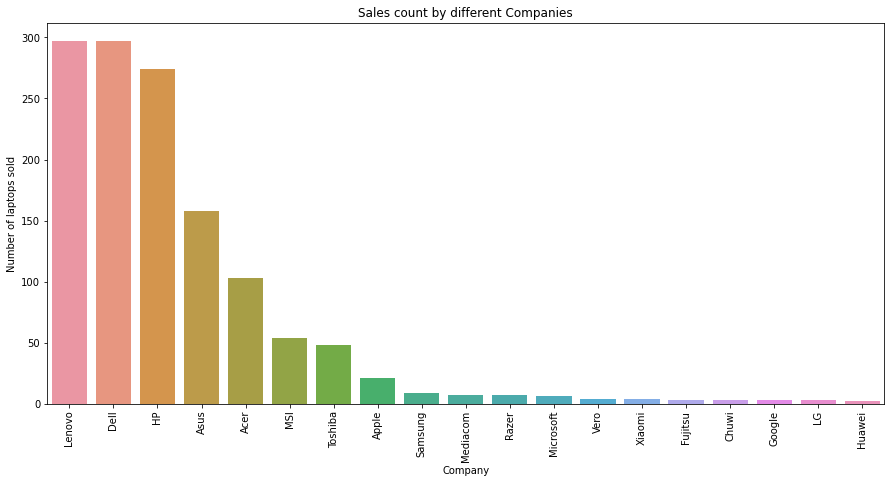

In [10]:
plt.figure(figsize = (15, 7))
plt.title('Sales count by different Companies')
sns.countplot(x = "Company", data = df,order = df['Company'].value_counts().index)
plt.xticks(rotation = 'vertical')
plt.ylabel('Number of laptops sold')
plt.show()

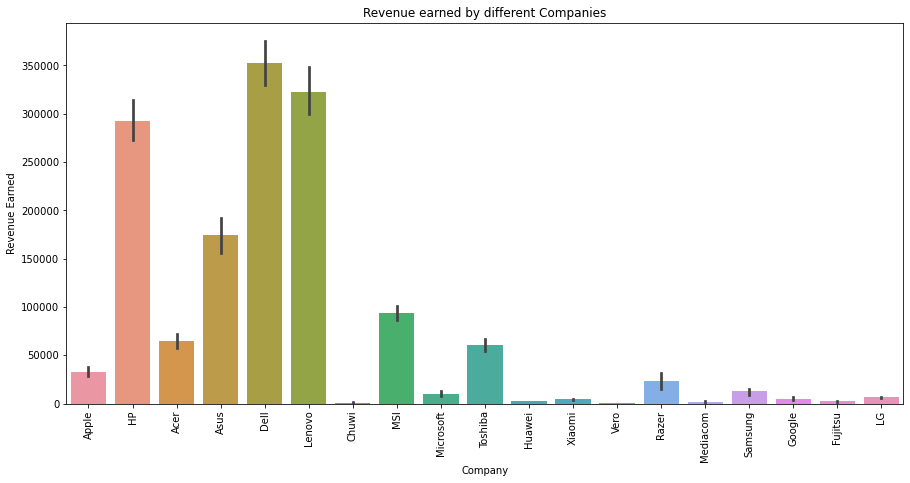

In [11]:
plt.figure(figsize = (15, 7))
plt.title('Revenue earned by different Companies')
sns.barplot(x = "Company",y='Price_euros', data = df, estimator=sum)
plt.xticks(rotation = 'vertical')
plt.ylabel('Revenue Earned')
plt.show()

<AxesSubplot:xlabel='Price_euros', ylabel='Count'>

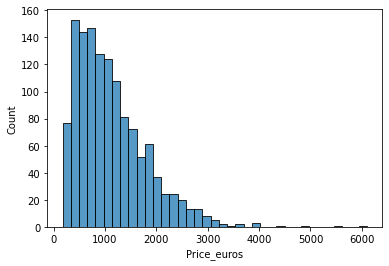

In [12]:
sns.histplot(x = 'Price_euros', data = df)

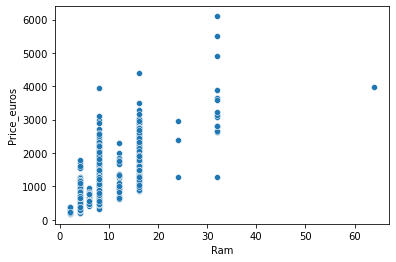

In [13]:
sns.scatterplot(x = "Ram", y = "Price_euros", data = df);

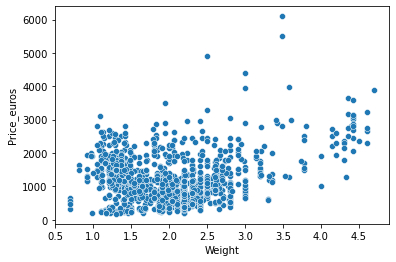

In [14]:
sns.scatterplot(x = "Weight", y = "Price_euros", data = df);

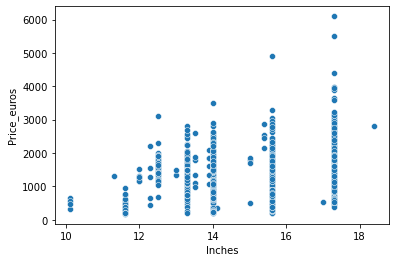

In [15]:
sns.scatterplot(x = "Inches", y = "Price_euros", data = df);

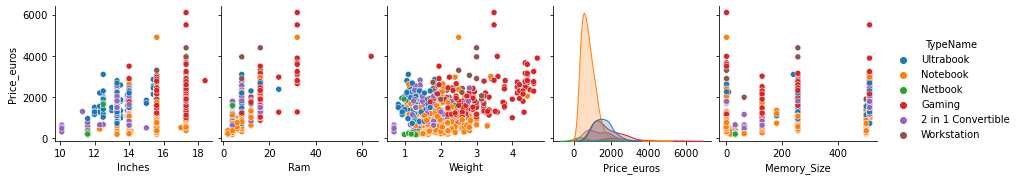

In [16]:
sns.pairplot(df,hue="TypeName",y_vars=['Price_euros'])

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

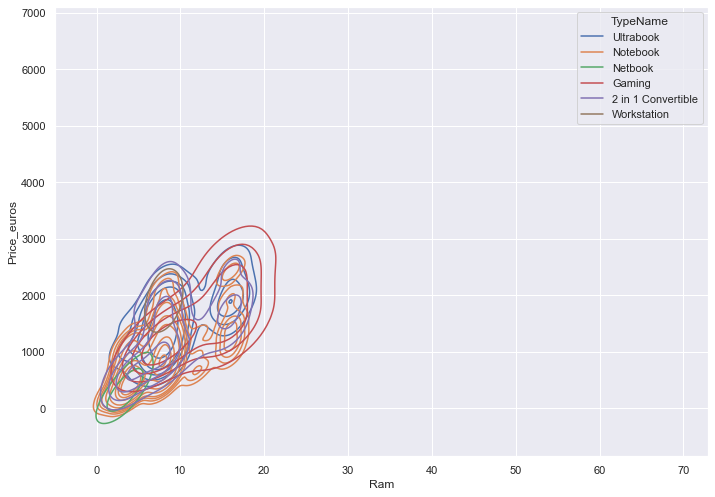

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.kdeplot(data=df, x="Ram", y="Price_euros", hue="TypeName", thresh=.1,)

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

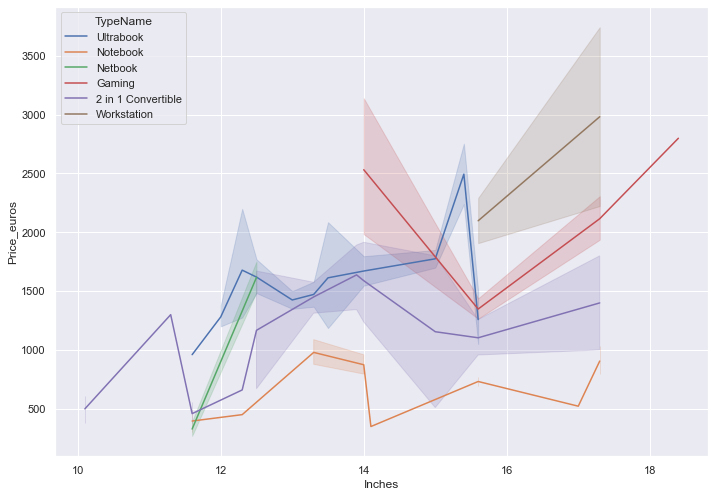

In [18]:
sns.lineplot(x="Inches", y="Price_euros",hue="TypeName",data=df)

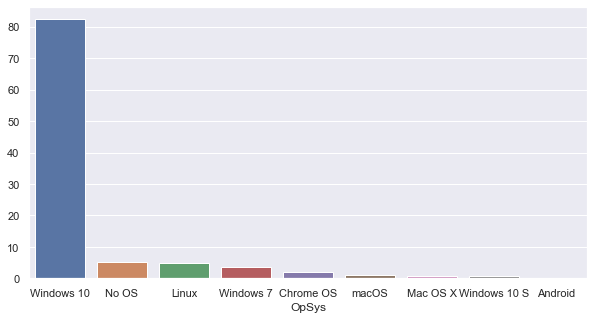

In [19]:
os_sales = df.groupby('OpSys').count().sort_values(by = 'Company', ascending = False)
pct = list(map(lambda x: (x / 1302)*100, os_sales.Company))

fig, ax1 = plt.subplots(figsize=(10,5))
sns.barplot(data = os_sales, x= os_sales.index, y= pct)


plt.show()

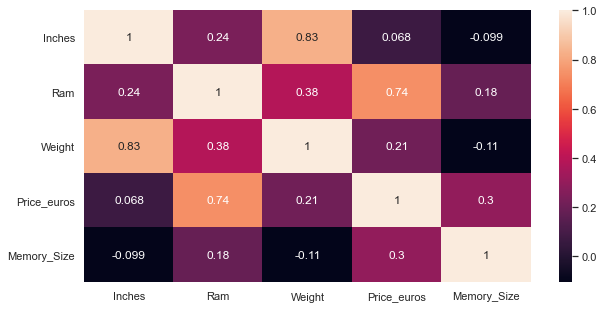

In [20]:
fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(df.corr(), annot = True)
plt.show()

## SLR

In [21]:
temp = df[['Ram','Price_euros']]

In [22]:
temp

,Ram,Price_euros
0,8,1339.69
1,8,898.94
2,8,575.00
3,16,2537.45
4,8,1803.60
...,...,...
1298,4,638.00
1299,16,1499.00
1300,2,229.00
1301,6,764.00


In [23]:
x = df.Ram
y = df.Price_euros
model = LinearRegression()
model.fit(np.array(x).reshape(-1,1),y)

LinearRegression()

In [24]:
intercept_ = model.intercept_ 
print('intercept:', intercept_)

intercept: 267.49488881277


In [25]:
model.coef_ = model.coef_ 
print('slope:', model.coef_)

slope: [102.14414117]


In [26]:
r2 = model.score(np.array(x).reshape(-1,1),y)
print('coefficient of determination:', r2)

coefficient of determination: 0.5520596030334446


#### The R square value is 0.5521. Hence the accuracy of SLR model is 55.21%

## MLR

In [27]:
X = df[['Inches', 'Ram', 'Weight','Memory_Size']]
Y = df['Price_euros']

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=4)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [29]:
intercept_ = model.intercept_ 
print('intercept:', intercept_)

intercept: 989.2090772794726


In [30]:
model.coef_ = model.coef_ 
print('slope:', model.coef_)

slope: [-67.74310939 106.73210615  60.12369253   0.60025573]


In [31]:
model.predict(X_test)

array([ 562.43748273,  645.28258503,  482.59758385,  779.72024391,
        568.44985198,  791.74498241, 1908.39374266, 2235.62564072,
        486.20500541,  791.74498241, 1321.56193479,  738.64063693,
        840.65698453,  702.82499383,  848.91648696,  901.70992841,
        977.34116881,  506.40612416, 1050.56648031, 2071.31600794,
       1179.83539358, 1817.05927243,  852.08146731, 1060.18627111,
       1134.30474139, 1067.69303607,  677.99027854, 1025.44012284,
       1146.93071683,  919.14579924, 1060.18627111, 2192.85465479,
       1130.09608292, 2124.39118583, 1058.98379726,  858.74679733,
        492.21737466, 1323.96688249,  681.57118188, 1166.17029844,
        573.5202709 ,  785.73261316,  913.2830215 , 2144.23200437,
        372.68203404, 1187.21359082,  709.06377097,  699.6692177 ,
        919.14579924, 1167.89646869,  865.8634527 , 1955.20143491,
       1130.09608292, 1422.90793808, 1068.00235114, 2175.41878396,
       1932.08022804,  645.28258503,  785.73261316,  720.00229

In [32]:
Y_test.values

array([ 498.  ,  572.  ,  521.47,  349.  ,  575.  ,  369.  , 1849.  ,
       1650.  ,  621.45,  393.49,  729.  , 1205.  ,  849.  ,  859.  ,
        959.  ,  979.  , 1049.  ,  209.  , 1900.  , 1899.  ,  495.  ,
       2625.  , 2899.  , 1829.  , 2229.  , 1119.  , 1096.  , 1260.  ,
       1010.51,  647.  ,  769.  , 1197.  , 1750.  , 2450.  ,  895.01,
        579.  ,  499.  , 2013.1 ,  719.  , 1903.  ,  229.  ,  398.  ,
       1399.  , 1764.  ,  199.  , 1124.  ,  269.  ,  479.  , 1169.  ,
       1363.  ,  722.  , 2749.99, 1637.  , 1327.  ,  728.  , 1747.  ,
       1181.27,  498.9 ,  400.  ,  973.  ,  489.9 ,  759.  , 1179.  ,
        806.  , 1299.  , 2299.  ,  899.  ,  699.  ,  393.9 , 1285.  ,
       1030.99,  764.  ,  744.  , 1650.  ,  949.  ,  891.  , 2094.48,
        784.  ,  691.  ,  597.  ,  349.  , 2449.  , 2051.  ,  659.01,
       2199.  , 2229.  , 1460.  , 1518.55,  915.  , 1262.  ,  899.  ,
        569.  ,  813.  , 1449.  ,  380.  ,  800.  ,  379.  ,  825.  ,
        619.  ,  468

In [33]:
model.score(X_train, Y_train)

0.6059855456898666

#### The R-square value is 0.6060. Hence the accuracy of the MLR model is 60.6%

## Bonus Question

In [34]:
import statsmodels.api as sm

In [35]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:            Price_euros   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              2432.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                        0.00
Time:                        23:41:24   Log-Likelihood:                         -9821.3
No. Observations:                1303   AIC:                                  1.965e+04
Df Residuals:                    1299   BIC:                                  1.967e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------